<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
import numpy as np
def sum_prod(X, V):
    if len(X) == 0:
        return np.array([])
    
    result = np.zeros_like(X[0] @ V[0])
    
    for i in range(len(X)):
        result += X[i] @ V[i]
    
    return result

def test_sum_prod():
    #Одна матрица и один вектор
    X1 = [np.array([[1, 2], [3, 4]])]
    V1 = [np.array([[1], [2]])]
    result1 = sum_prod(X1, V1)
    expected1 = np.array([[5], [11]])  # [[1,2],[3,4]] @ [[1],[2]]
    assert np.array_equal(result1, expected1)
    
    #Две матрицы и два вектора
    X2 = [
        np.array([[1, 0], [0, 1]]),
        np.array([[2, 0], [0, 2]])
    ]
    V2 = [
        np.array([[1], [2]]),
        np.array([[3], [4]])
    ]
    result2 = sum_prod(X2, V2)
    expected2 = np.array([[7], [10]])  # [[1],[2]] + [[6],[8]]
    assert np.array_equal(result2, expected2)
    
    #Три матрицы 
    X3 = [
        np.eye(3),
        np.ones((3, 3)),
        np.zeros((3, 3))
    ]
    V3 = [
        np.array([[1], [2], [3]]),
        np.array([[1], [1], [1]]),
        np.array([[0], [0], [0]])
    ]
    result3 = sum_prod(X3, V3)
    expected3 = np.array([[4], [5], [6]])  # [[1],[2],[3]] + [[3],[3],[3]] + [[0],[0],[0]]
    assert np.array_equal(result3, expected3)
    
    #Пустые
    X4 = []
    V4 = []
    result4 = sum_prod(X4, V4)
    assert result4.size == 0
    
    print("Все тесты пройдены!")

test_sum_prod()

Все тесты пройдены!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
import numpy as np
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M1 = np.array([[0.1, 0.6], [0.4, 0.9]])
    result1 = binarize(M1, 0.5)
    expected1 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(result1, expected1)
    
    M2 = np.array([[0.3, 0.7], [0.49, 0.51]])
    result2 = binarize(M2)
    expected2 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(result2, expected2)
    
    M3 = np.array([[0.9, 0.8], [0.95, 0.85]])
    result4 = binarize(M3, 0.5)
    expected4 = np.array([[1, 1], [1, 1]])
    assert np.array_equal(result4, expected4)
    
    M4 = np.array([[-1, 2], [0.5, -0.5]])
    result6 = binarize(M4, 0)
    expected6 = np.array([[0, 1], [1, 0]])
    assert np.array_equal(result6, expected6)
    
    print("тесты пройдены")


test_binarize()

тесты пройдены


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
#Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода
import numpy as np

def unique_rows(mat):
    result = []
    for row in mat:
        unique_elements = np.unique(row)
        result.append(unique_elements)
    return result

def unique_columns(mat):
    transposed = mat.T
    return unique_rows(transposed)


def test_unique_functions():
    # Тест 1
    matrix1 = np.array([[1, 1, 2],
                       [3, 3, 3], 
                       [4, 5, 4]])
    
    rows1 = unique_rows(matrix1)
    cols1 = unique_columns(matrix1)
    
    #по строкам
    assert np.array_equal(rows1[0], [1, 2])
    assert np.array_equal(rows1[1], [3])
    assert np.array_equal(rows1[2], [4, 5])
    
    #по столбцам
    assert np.array_equal(cols1[0], [1, 3, 4])
    assert np.array_equal(cols1[1], [1, 3, 5])
    assert np.array_equal(cols1[2], [2, 3, 4])
    
    # Тест 2
    matrix2 = np.array([[1, 2],
                       [3, 4]])
    
    rows2 = unique_rows(matrix2)
    cols2 = unique_columns(matrix2)
    
    assert np.array_equal(rows2[0], [1, 2])
    assert np.array_equal(rows2[1], [3, 4])
    assert np.array_equal(cols2[0], [1, 3])
    assert np.array_equal(cols2[1], [2, 4])
    
    # Тест 3: Одинаковые строки
    matrix3 = np.array([[1, 1, 1],
                       [1, 1, 1]])
    
    rows3 = unique_rows(matrix3)
    cols3 = unique_columns(matrix3)
    
    assert np.array_equal(rows3[0], [1])
    assert np.array_equal(rows3[1], [1])
    assert np.array_equal(cols3[0], [1])
    assert np.array_equal(cols3[1], [1])
    assert np.array_equal(cols3[2], [1])
      
    print("тесты пройдены")

test_unique_functions()

тесты пройдены


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Матрица:
[[ 1.50459587  0.39352994  1.44396102 -0.87147504]
 [-2.21096282  0.20481939 -1.03851575 -0.79364989]
 [ 1.64796759  0.71133312  1.30325945 -1.73727621]]

Строки:
Строка 0: mean=0.618, var=0.934
Строка 1: mean=-0.960, var=0.739
Строка 2: mean=0.481, var=1.753

Столбцы:
Столбец 0: mean=0.314, var=3.191
Столбец 1: mean=0.437, var=0.044
Столбец 2: mean=0.570, var=1.296
Столбец 3: mean=-1.134, var=0.183


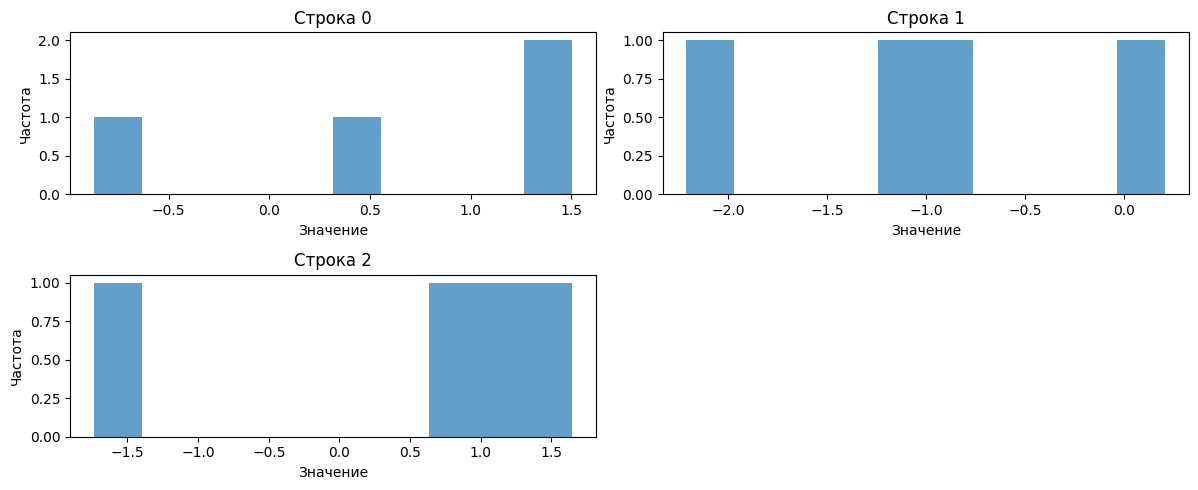

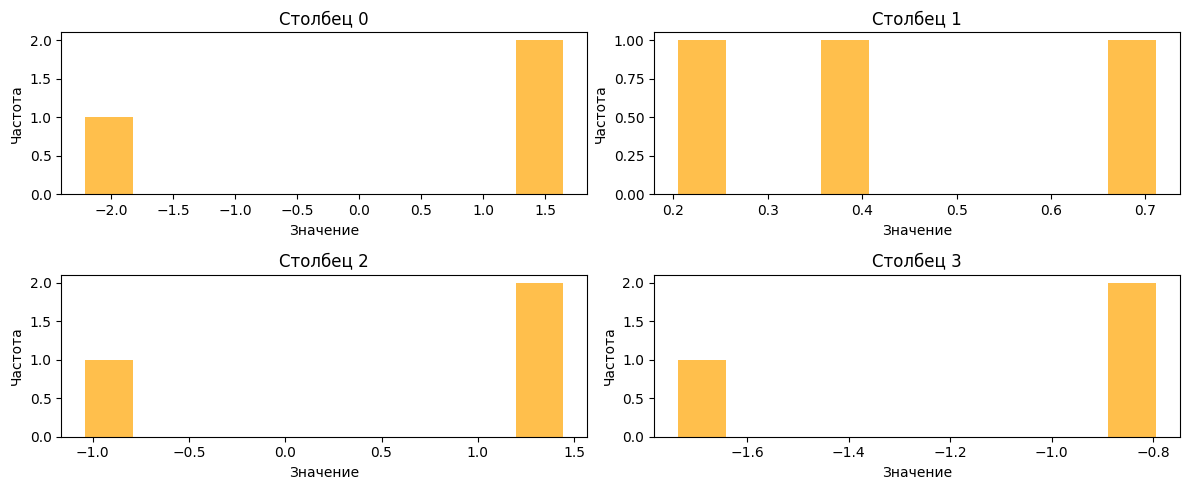

Матрица:
[[3.4514302  6.47289545]
 [9.57139207 6.93269309]]

Строки:
Строка 0: mean=4.962, var=2.282
Строка 1: mean=8.252, var=1.741

Столбцы:
Столбец 0: mean=6.511, var=9.363
Столбец 1: mean=6.703, var=0.053


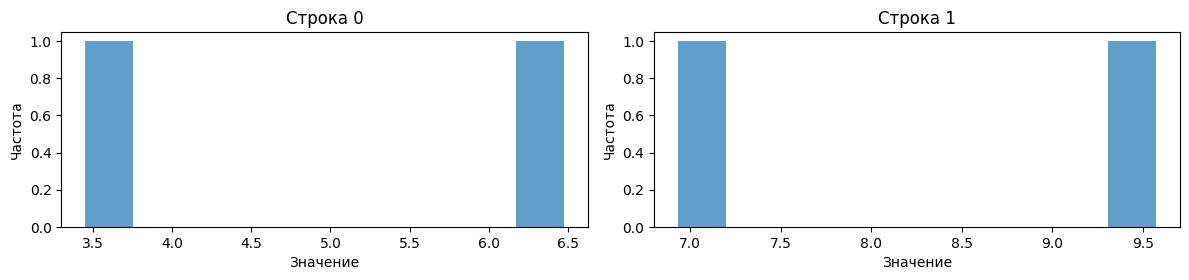

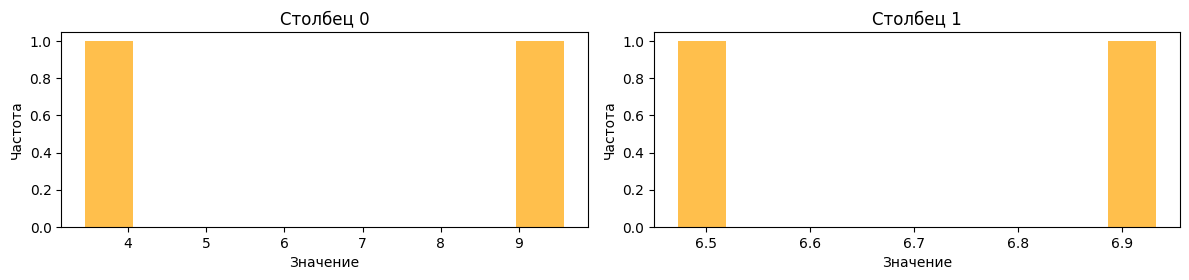

Матрица:
[[ 9.55486232 10.58685419 10.18459316]
 [ 9.98944493  9.36357428  9.40822665]
 [10.61683016  9.93362417 10.04996346]
 [ 9.64208491 11.17000516  9.74427703]
 [10.65360411 10.60889653 10.12319169]]

Строки:
Строка 0: mean=10.109, var=0.180
Строка 1: mean=9.587, var=0.081
Строка 2: mean=10.200, var=0.089
Строка 3: mean=10.185, var=0.486
Строка 4: mean=10.462, var=0.058

Столбцы:
Столбец 0: mean=10.091, var=0.218
Столбец 1: mean=10.333, var=0.388
Столбец 2: mean=9.902, var=0.084


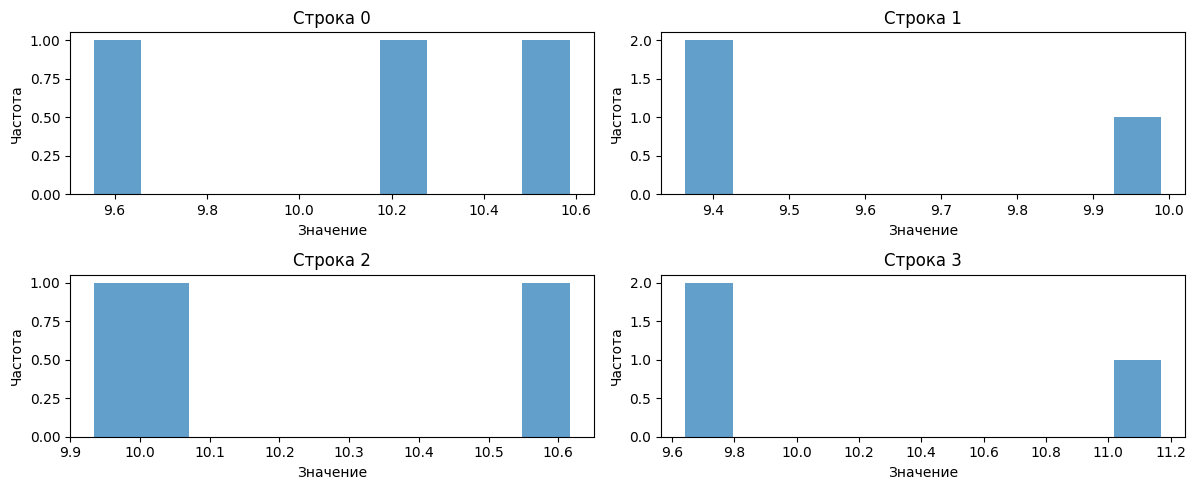

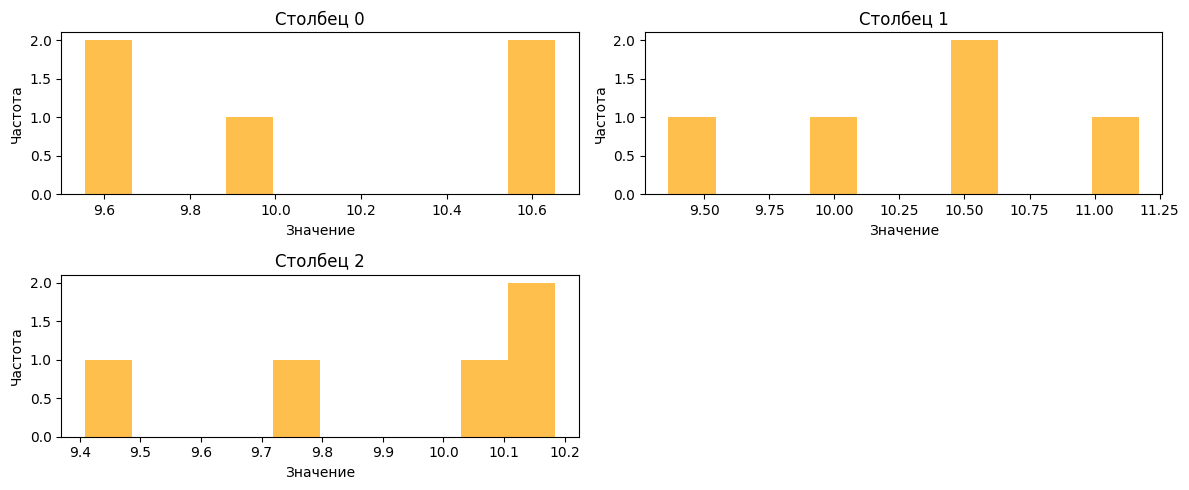

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_normal_matrix(m, n, loc=0, scale=1):
    # Создаем матрицу
    matrix = np.random.normal(loc=loc, scale=scale, size=(m, n))
    
    # Статистики для строк
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    # Статистики для столбцов
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    # Вывод статистик
    print("Матрица:")
    print(matrix)
    print("\nСтроки:")
    for i in range(m):
        print(f"Строка {i}: mean={row_means[i]:.3f}, var={row_vars[i]:.3f}")
    
    print("\nСтолбцы:")
    for j in range(n):
        print(f"Столбец {j}: mean={col_means[j]:.3f}, var={col_vars[j]:.3f}")
    
    # Гистограммы строк
    plt.figure(figsize=(12, 5))
    for i in range(min(4, m)):
        plt.subplot(2, 2, i+1)
        plt.hist(matrix[i], bins=10, alpha=0.7)
        plt.title(f'Строка {i}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()
    
    # Гистограммы столбцов
    plt.figure(figsize=(12, 5))
    for j in range(min(4, n)):
        plt.subplot(2, 2, j+1)
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='orange')
        plt.title(f'Столбец {j}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()
    
    return matrix

# Тесты
def test_analyze():
    analyze_normal_matrix(3, 4)

    analyze_normal_matrix(2, 2, loc=5, scale=2)

    analyze_normal_matrix(5, 3, loc=10, scale=0.5)

test_analyze()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [11]:
import numpy as np

def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=type(a))
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
                
    return matrix

def test_chess():
    result1 = chess(2, 2, 0, 1)
    expected1 = np.array([[0, 1], [1, 0]])
    assert np.array_equal(result1, expected1)

    result2 = chess(3, 3, 'A', 'B')
    expected2 = np.array([['A', 'B', 'A'], ['B', 'A', 'B'], ['A', 'B', 'A']])
    assert np.array_equal(result2, expected2)
 
    result3 = chess(1, 1, 5, 10)
    expected3 = np.array([[5]])
    assert np.array_equal(result3, expected3)
    

    result4 = chess(3, 2, 1, 0)
    expected4 = np.array([[1, 0], [0, 1], [1, 0]])
    assert np.array_equal(result4, expected4)
    
    print("тесты пройдены")

test_chess()

тесты пройдены


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [12]:
import numpy as np
from PIL import Image

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.full((n, m, 3), background_color, dtype=np.uint8)
    cx, cy = m // 2, n // 2
    x0, x1 = cx - a // 2, cx + a // 2
    y0, y1 = cy - b // 2, cy + b // 2
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(m, x1)
    y1 = min(n, y1)
    img[y0:y1, x0:x1] = rectangle_color
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.full((n, m, 3), background_color, dtype=np.uint8)
    cx, cy = m // 2, n // 2
    y, x = np.ogrid[:n, :m]
    mask = ((x - cx)**2) / (a**2) + ((y - cy)**2) / (b**2) <= 1
    img[mask] = ellipse_color
    return img

def test_draw_rectangle():
    img = draw_rectangle(50, 30, 100, 80, (255, 0, 0), (0, 0, 0))
    assert img.shape == (80, 100, 3)
    assert np.array_equal(img[0, 0], (0, 0, 0))
    assert np.array_equal(img[40, 50], (255, 0, 0))
    img_large = draw_rectangle(200, 150, 100, 80, (0, 255, 0), (255, 255, 255))
    assert img_large.shape == (80, 100, 3)

def test_draw_ellipse():
    img = draw_ellipse(40, 20, 100, 80, (0, 0, 255), (255, 255, 255))
    assert img.shape == (80, 100, 3)
    assert np.array_equal(img[0, 0], (255, 255, 255))
    assert np.array_equal(img[40, 50], (0, 0, 255))
    img_circle = draw_ellipse(30, 30, 100, 100, (255, 0, 0), (0, 0, 0))
    assert img_circle.shape == (100, 100, 3)

def test_edge_cases():
    img_zero = draw_rectangle(0, 0, 100, 100, (255, 0, 0), (0, 0, 0))
    assert np.all(img_zero == (0, 0, 0))
    img_small = draw_rectangle(5, 5, 10, 10, (255, 255, 0), (0, 0, 0))
    assert img_small.shape == (10, 10, 3)
    img_colors = draw_rectangle(20, 20, 50, 50, (128, 64, 32), (255, 128, 64))
    assert img_colors.shape == (50, 50, 3)

if __name__ == "__main__":
    test_draw_rectangle()
    test_draw_ellipse()
    test_edge_cases()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [9]:
import numpy as np

def analyze_time_series(data, p):
    data = np.array(data, dtype=float)
    mean_value = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)
    
    local_max = []
    local_min = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1]:
            local_max.append(i)
        elif data[i] < data[i - 1] and data[i] < data[i + 1]:
            local_min.append(i)
    
    window = np.ones(p) / p
    moving_average = np.convolve(data, window, mode='valid')
    
    result = {
        'математическое ожидание': mean_value,
        'дисперсия': variance,
        'стандартное отклонение': std_dev,
        'индексы локальных максимумов': local_max,
        'индексы локальных минимумов': local_min,
        'ряд скользящего среднего': moving_average
    }
    
    return result

data = [3, 5, 2, 8, 6, 7, 4, 9, 3, 5, 2]
p = 3
result = analyze_time_series(data, p)

for key, value in result.items():
    print(f"{key}: {value}")

математическое ожидание: 4.909090909090909
дисперсия: 5.1735537190082646
стандартное отклонение: 2.2745447278539643
индексы локальных максимумов: [1, 3, 5, 7, 9]
индексы локальных минимумов: [2, 4, 6, 8]
ряд скользящего среднего: [3.33333333 5.         5.33333333 7.         5.66666667 6.66666667
 5.33333333 5.66666667 3.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [10]:
import numpy as np

def one_hot_encode(labels):
    labels = np.array(labels, dtype=int)
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((labels.size, num_classes), dtype=int)
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot

labels = [0, 2, 3, 0]
encoded = one_hot_encode(labels)
print(encoded)

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
